In [13]:
#%%

import pandas as pd


''' Before starting, save the 'Well' sheet from the .xlsx as a .csv, name it 'G-1260_T.csv'
    Set the Working Directory to the saved location of this new CSV file '''

%cd C:\\Users\\Christopher\\Documents\\IAA\\TimeSeries\\HW4\\data

#%% Read data in
df = pd.read_csv('G-1260_T.csv', parse_dates = True)

#%% Create a new column that contains the strings of 'date' column and 'time' column
df['date_hour'] = df['date'] + " " + df['time']

#%% Create a set format for which to read the string as a datetime variable
time_format = "%m/%d/%Y %H:%M"

df['date_hour'] = pd.to_datetime(df['date_hour'], format = time_format)

#%% Reorganize the column order
df = df[['date_hour','date','time','Corrected']]

#%% Setting index to be the date_hour column
df = df.set_index('date_hour')

#%% Select dates in the range required
data_narrow = df['2007-10-01 01:00:00':'2018-06-08 11:00:00']

#%% Resample data to hourly
data_hourly = data_narrow.resample('H').mean()

#%% Write the final clean data to csv
data_hourly.to_csv('G-1260_Hourly.csv')


C:\Users\Christopher\Documents\IAA\TimeSeries\HW4\data


In [32]:
data_hourly.shape

(93683, 1)

In [27]:
data_hourly[data_hourly.Corrected.isna()]

DatetimeIndex(['2007-10-15 21:00:00', '2007-10-15 22:00:00',
               '2007-10-15 23:00:00', '2007-10-16 01:00:00',
               '2007-10-16 02:00:00', '2007-10-16 03:00:00',
               '2007-10-16 04:00:00', '2007-12-02 20:00:00',
               '2007-12-02 21:00:00', '2007-12-02 22:00:00',
               ...
               '2014-10-29 18:00:00', '2014-10-29 19:00:00',
               '2014-10-29 20:00:00', '2014-10-29 21:00:00',
               '2014-10-29 22:00:00', '2014-10-29 23:00:00',
               '2015-03-08 02:00:00', '2016-03-13 02:00:00',
               '2017-03-12 02:00:00', '2018-03-11 02:00:00'],
              dtype='datetime64[ns]', name='date_hour', length=508, freq=None)

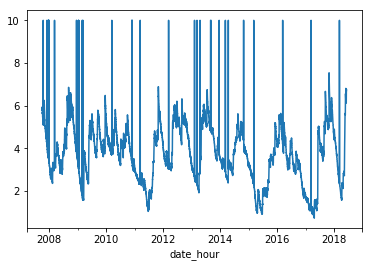

In [30]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
data_hourly.Corrected.plot()